In [1]:
temp = pd.read_csv(r"1429_1.csv")
temp.head()

NameError: name 'pd' is not defined

In [1]:
import pandas as pd
temp = pd.read_csv(r"1429_1.csv")
temp.head()

C:\Users\nandini jampala\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3057: DtypeWarning: Columns (1,10) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,id,name,asins,brand,categories,keys,manufacturer,reviews.date,reviews.dateAdded,reviews.dateSeen,...,reviews.doRecommend,reviews.id,reviews.numHelpful,reviews.rating,reviews.sourceURLs,reviews.text,reviews.title,reviews.userCity,reviews.userProvince,reviews.username
0,AVqkIhwDv8e3D1O-lebb,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",B01AHB9CN2,Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...","841667104676,amazon/53004484,amazon/b01ahb9cn2...",Amazon,2017-01-13T00:00:00.000Z,2017-07-03T23:33:15Z,"2017-06-07T09:04:00.000Z,2017-04-30T00:45:00.000Z",...,True,NaN,0.0,5.0,http://reviews.bestbuy.com/3545/5620406/review...,This product so far has not disappointed. My c...,Kindle,NaN,NaN,Adapter
1,AVqkIhwDv8e3D1O-lebb,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",B01AHB9CN2,Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...","841667104676,amazon/53004484,amazon/b01ahb9cn2...",Amazon,2017-01-13T00:00:00.000Z,2017-07-03T23:33:15Z,"2017-06-07T09:04:00.000Z,2017-04-30T00:45:00.000Z",...,True,NaN,0.0,5.0,http://reviews.bestbuy.com/3545/5620406/review...,great for beginner or experienced person. Boug...,very fast,NaN,NaN,truman
2,AVqkIhwDv8e3D1O-lebb,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",B01AHB9CN2,Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...","841667104676,amazon/53004484,amazon/b01ahb9cn2...",Amazon,2017-01-13T00:00:00.000Z,2017-07-03T23:33:15Z,"2017-06-07T09:04:00.000Z,2017-04-30T00:45:00.000Z",...,True,NaN,0.0,5.0,http://reviews.bestbuy.com/3545/5620406/review...,Inexpensive tablet for him to use and learn on...,Beginner tablet for our 9 year old son.,NaN,NaN,DaveZ
3,AVqkIhwDv8e3D1O-lebb,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",B01AHB9CN2,Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...","841667104676,amazon/53004484,amazon/b01ahb9cn2...",Amazon,2017-01-13T00:00:00.000Z,2017-07-03T23:33:15Z,"2017-06-07T09:04:00.000Z,2017-04-30T00:45:00.000Z",...,True,NaN,0.0,4.0,http://reviews.bestbuy.com/3545/5620406/review...,I've had my Fire HD 8 two weeks now and I love...,Good!!!,NaN,NaN,Shacks
4,AVqkIhwDv8e3D1O-lebb,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",B01AHB9CN2,Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...","841667104676,amazon/53004484,amazon/b01ahb9cn2...",Amazon,2017-01-12T00:00:00.000Z,2017-07-03T23:33:15Z,"2017-06-07T09:04:00.000Z,2017-04-30T00:45:00.000Z",...,True,NaN,0.0,5.0,http://reviews.bestbuy.com/3545/5620406/review...,I bought this for my grand daughter when she c...,Fantastic Tablet for kids,NaN,NaN,explore42


In [2]:
import matplotlib.pyplot as plt
import matplotlib as mpl
import nltk.classify.util
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.metrics import roc_curve, auc
from nltk.classify import NaiveBayesClassifier
import numpy as np
import re



In [3]:
permanent = temp[['reviews.rating' , 'reviews.text' , 'reviews.title' , 'reviews.username']]
print(permanent.isnull().sum()) #Checking for null values
permanent.head()

reviews.rating      33
reviews.text         1
reviews.title        5
reviews.username     2
dtype: int64


,reviews.rating,reviews.text,reviews.title,reviews.username
0,5.0,This product so far has not disappointed. My c...,Kindle,Adapter
1,5.0,great for beginner or experienced person. Boug...,very fast,truman
2,5.0,Inexpensive tablet for him to use and learn on...,Beginner tablet for our 9 year old son.,DaveZ
3,4.0,I've had my Fire HD 8 two weeks now and I love...,Good!!!,Shacks
4,5.0,I bought this for my grand daughter when she c...,Fantastic Tablet for kids,explore42


In [4]:
check =  permanent[permanent["reviews.rating"].isnull()]
check.head()

,reviews.rating,reviews.text,reviews.title,reviews.username
2886,NaN,The Kindle is my first e-ink reader. I own an ...,"Worth the money. Not perfect, but very very go...",Jeffrey Stanley
2887,NaN,"I'm a first-time Kindle owner, so I have nothi...","I Wanted a Dedicated E-Reader, and That's What...",Matthew Coenen
2888,NaN,UPDATE NOVEMBER 2011:My review is now over a y...,Kindle vs. Nook (updated),Ron Cronovich
2889,NaN,"I'm a first-time Kindle owner, so I have nothi...","I Wanted a Dedicated E-Reader, and That's What...",Matthew Coenen
2890,NaN,I woke up to a nice surprise this morning: a n...,"Not the perfect do-it-all device, but very clo...",C. Tipton


In [5]:
senti= permanent[permanent["reviews.rating"].notnull()]
permanent.head()

,reviews.rating,reviews.text,reviews.title,reviews.username
0,5.0,This product so far has not disappointed. My c...,Kindle,Adapter
1,5.0,great for beginner or experienced person. Boug...,very fast,truman
2,5.0,Inexpensive tablet for him to use and learn on...,Beginner tablet for our 9 year old son.,DaveZ
3,4.0,I've had my Fire HD 8 two weeks now and I love...,Good!!!,Shacks
4,5.0,I bought this for my grand daughter when she c...,Fantastic Tablet for kids,explore42


In [6]:
senti["senti"] = senti["reviews.rating"]>=4
senti["senti"] = senti["senti"].replace([True , False] , ["pos" , "neg"])

C:\Users\nandini jampala\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\Users\nandini jampala\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


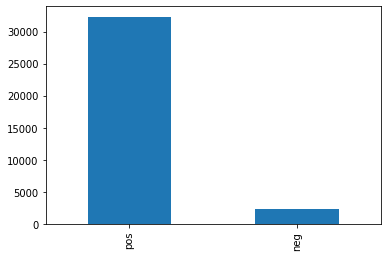

In [7]:

senti["senti"].value_counts().plot.bar()

In [8]:
import nltk.classify.util
from nltk.classify import NaiveBayesClassifier
import numpy as np
import re
import string
import nltk

cleanup_re = re.compile('[^a-z]+')
def cleanup(sentence):
    sentence = str(sentence)
    sentence = sentence.lower()
    sentence = cleanup_re.sub(' ', sentence).strip()
    #sentence = " ".join(nltk.word_tokenize(sentence))
    return sentence

senti["Summary_Clean"] = senti["reviews.text"].apply(cleanup)
check["Summary_Clean"] = check["reviews.text"].apply(cleanup)

C:\Users\nandini jampala\Anaconda3\lib\site-packages\ipykernel_launcher.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()
C:\Users\nandini jampala\Anaconda3\lib\site-packages\ipykernel_launcher.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [9]:
split = senti[["Summary_Clean" , "senti"]]
train=split.sample(frac=0.8,random_state=200)
test=split.drop(train.index)

In [10]:
def word_feats(words):
    features = {}
    for word in words:
        features [word] = True
    return features

In [47]:
train["words"] = train["Summary_Clean"].str.lower().str.split()
test["words"] = test["Summary_Clean"].str.lower().str.split()
check["words"] = check["Summary_Clean"].str.lower().str.split()

train.index = range(train.shape[0])
test.index = range(test.shape[0])
check.index = range(check.shape[0])
prediction =  {} ## For storing results of different classifiers

train_naive = []
test_naive = []
check_naive = []

for i in range(train.shape[0]):
    train_naive = train_naive +[[word_feats(train["words"][i]) , train["senti"][i]]]
for i in range(test.shape[0]):
    test_naive = test_naive +[[word_feats(test["words"][i]) , test["senti"][i]]]
for i in range(check.shape[0]):
    check_naive = check_naive +[word_feats(check["words"][i])]
classifier = NaiveBayesClassifier.train(train_naive)
print("NLTK Naive bayes Accuracy : {}".format(nltk.classify.util.accuracy(classifier , test_naive)))
classifier.show_most_informative_features(5)

C:\Users\nandini jampala\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


NLTK Naive bayes Accuracy : 0.5897472924187726
Most Informative Features
                 warning = True              neg : pos    =     51.3 : 1.0
                 deleted = True              neg : pos    =     51.3 : 1.0
                    nope = True              neg : pos    =     42.0 : 1.0
                  rotate = True              neg : pos    =     42.0 : 1.0
                    bent = True              neg : pos    =     42.0 : 1.0


In [53]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score,recall_score, f1_score, roc_curve, auc

y =[]
only_words= [test_naive[i][0] for i in range(test.shape[0])]
for i in range(test.shape[0]):
    y = y + [classifier.classify(only_words[i] )]
prediction["Naive"]= np.asarray(y)

y1 = []
for i in range(check.shape[0]):
    y1 = y1 + [classifier.classify(check_naive[i] )]

check["Naive"] = y1

C:\Users\nandini jampala\Anaconda3\lib\site-packages\ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  del sys.path[0]


In [52]:
from wordcloud import STOPWORDS

from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import CountVectorizer
stopwords = set(STOPWORDS)
stopwords.remove("not")

count_vect = CountVectorizer(min_df=2 ,stop_words=stopwords , ngram_range=(1,2))
tfidf_transformer = TfidfTransformer()

X_train_counts = count_vect.fit_transform(train["Summary_Clean"])        
X_train_tfidf = tfidf_transformer.fit_transform(X_train_counts)


X_new_counts = count_vect.transform(test["Summary_Clean"])
X_test_tfidf = tfidf_transformer.transform(X_new_counts)

checkcounts = count_vect.transform(check["Summary_Clean"])
checktfidf = tfidf_transformer.transform(checkcounts)

In [50]:
import wordcloud

In [57]:
from sklearn.naive_bayes import MultinomialNB
model1 = MultinomialNB().fit(X_train_tfidf , train["senti"])
prediction['naive bayes'] = model1.predict_proba(X_test_tfidf)[:,1]
print("Multinomial Accuracy : {}".format(model1.score(X_test_tfidf , test["senti"])))

check["multi"] = model1.predict(checktfidf)

Multinomial Accuracy : 0.9329963898916968


C:\Users\nandini jampala\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [58]:
from sklearn.naive_bayes import BernoulliNB
model2 = BernoulliNB().fit(X_train_tfidf,train["senti"])
prediction['AdaBoostClassifier '] = model2.predict_proba(X_test_tfidf)[:,1]
print("Bernoulli Accuracy : {}".format(model2.score(X_test_tfidf , test["senti"])))

check["Bill"] = model2.predict(checktfidf)

Bernoulli Accuracy : 0.9204332129963899


C:\Users\nandini jampala\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [54]:
from sklearn import linear_model
logreg = linear_model.LogisticRegression(solver='lbfgs' , C=1000)
logistic = logreg.fit(X_train_tfidf, train["senti"])
prediction['LogisticRegression'] = logreg.predict_proba(X_test_tfidf)[:,1]
print("Logistic Regression Accuracy : {}".format(logreg.score(X_test_tfidf , test["senti"])))

check["log"] = logreg.predict(checktfidf)

Logistic Regression Accuracy : 0.9373285198555956


C:\Users\nandini jampala\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\Users\nandini jampala\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys


In [55]:
words = count_vect.get_feature_names()
feature_coefs = pd.DataFrame(
    data = list(zip(words, logistic.coef_[0])),
    columns = ['feature', 'coef'])
feature_coefs.sort_values(by="coef")

,feature,coef
42481,terrible,-20.352050
48058,will definitely,-19.495217
10646,done great,-19.284680
38808,slow,-18.334396
18449,great year,-17.885817
36300,returning,-17.515921
32516,price isn,-16.317201
45890,using firestick,-16.302561
16576,gift three,-16.147438
36261,return,-16.097260


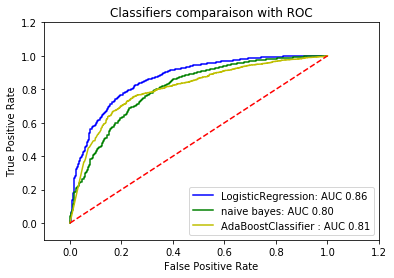

In [59]:
def formatt(x):
    if x == 'neg':
        return 0
    if x == 0:
        return 0
    return 1
vfunc = np.vectorize(formatt)

cmp = 0
colors = ['b', 'g', 'y', 'm', 'k']
for model, predicted in prediction.items():
    if model not in 'Naive':
        false_positive_rate, true_positive_rate, thresholds = roc_curve(test["senti"].map(vfunc), predicted)
        roc_auc = auc(false_positive_rate, true_positive_rate)
        plt.plot(false_positive_rate, true_positive_rate, colors[cmp], label='%s: AUC %0.2f'% (model,roc_auc))
        cmp += 1

plt.title('Classifiers comparaison with ROC')
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([-0.1,1.2])
plt.ylim([-0.1,1.2])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()